In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
import IPython.display as ipd 
from pydub import AudioSegment 
from pydub.utils import mediainfo 
speech = AudioSegment.from_wav('arctic_a0005.wav') # Read audio data from file 
x = speech.get_array_of_samples()  # samples x(t) 
x_sr = speech.frame_rate  # sampling rate f - see slide 24 in week 7 lecture slides 
print('Sampling rate: ', x_sr) 
print('Number of samples: ', len(x)) 

Sampling rate:  16000
Number of samples:  22640


c:\Users\micha\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
duration = librosa.get_duration(path = 'arctic_a0005.wav') 
n_samples = duration * x_sr 
print('duration: ', duration) 
print('n_samples: ', n_samples)

c:\Users\micha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


duration:  1.415
n_samples:  22640.0


Text(0, 0.5, 'Amplitude')

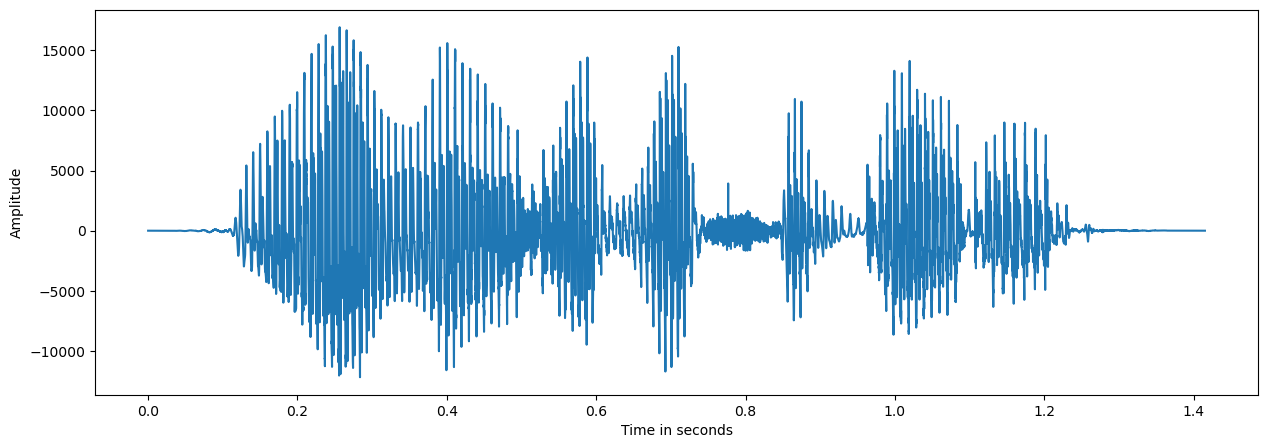

In [5]:
x_range = np.linspace(0, duration, len(x)) 
 
plt.figure(figsize = (15, 5)) 
plt.plot(x_range, x) 
plt.xlabel('Time in seconds') 
plt.ylabel('Amplitude') 

In [6]:
mid_point = int(len(x) / 2) 
x1 = x[0:mid_point] 
x2 = x[mid_point:len(x)] 
 
x1_audio = AudioSegment( 
                data = x1, #raw data 
                sample_width = 2, #2 bytes = 16 bit samples 
                frame_rate = x_sr, #frame rate     
                channels = 1) #channels = 1 for mono and 2 for stereo 
 
x2_audio = AudioSegment( 
                data = x2, #raw data 
                sample_width = 2, #2 bytes = 16 bit samples 
                frame_rate = x_sr, #frame rate 
                channels = 1) #channels = 1 for mono and 2 for stereo 
 
x1_audio.export('arctic_a0005_1.wav', format = 'wav') 
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

<_io.BufferedRandom name='arctic_a0005_2.wav'>

In [7]:
duration1 = librosa.get_duration(path = 'arctic_a0005_1.wav') 
n_samples1 = duration1 * x_sr 
print('duration_1: ', duration1) 
print('n_samples_1: ', n_samples1) 

duration_1:  0.7075
n_samples_1:  11320.0


Text(0, 0.5, 'Amplitude')

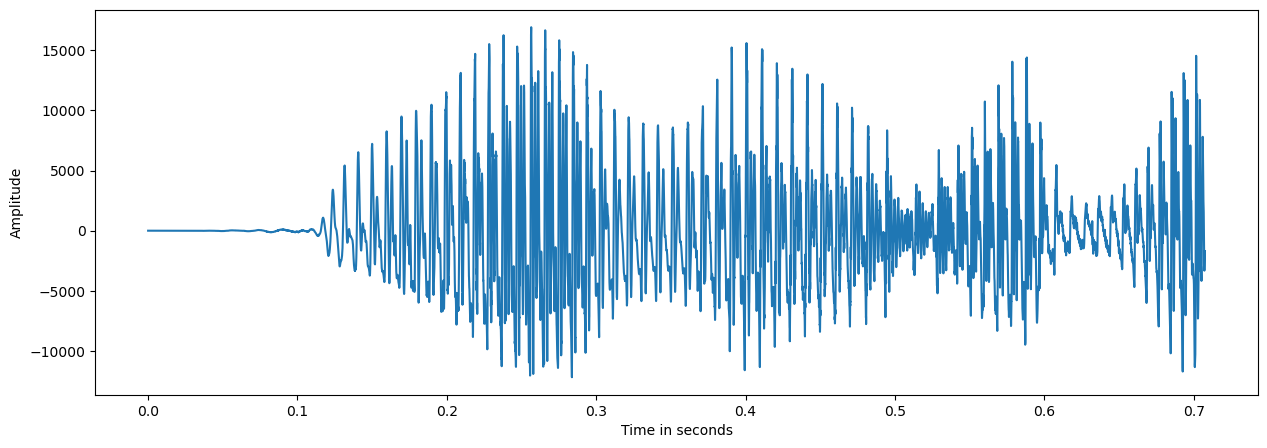

In [9]:
x_range1 = np.linspace(0, duration1, len(x1)) 
 
plt.figure(figsize = (15, 5)) 
plt.plot(x_range1, x1) 
plt.xlabel('Time in seconds') 
plt.ylabel('Amplitude') 

In [10]:
duration2 = librosa.get_duration(path = 'arctic_a0005_2.wav') 
n_samples2 = duration2 * x_sr 
print('duration_2: ', duration2) 
print('n_samples_2: ', n_samples2) 

duration_2:  0.7075
n_samples_2:  11320.0


Text(0, 0.5, 'Amplitude')

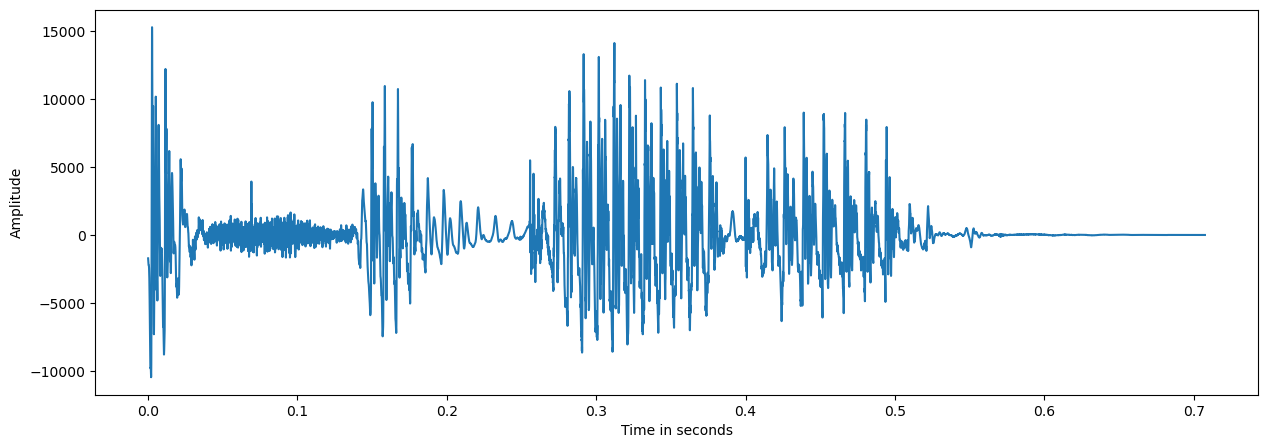

In [11]:
x_range2 = np.linspace(0, duration2, len(x2)) 
 
plt.figure(figsize = (15, 5)) 
plt.plot(x_range2, x2) 
plt.xlabel('Time in seconds') 
plt.ylabel('Amplitude') 

In [12]:
#range of frequencies of interest for speech signal.  
#It can be any positive value, but should be a power of 2 
freq_range = 1024  
#window size: the number of samples per frame. Each frame is of 30ms = 0.03 sec 
win_length = int(x_sr * 0.03) 
#number of samples between two consecutive frames, by default it is set to win_length/4 
hop_length = int(win_length / 2) 
#windowing technique 
window = 'hann' 
X = librosa.stft(np.float32(x),  
n_fft = freq_range,  
window = window,  
hop_length = hop_length,  
win_length = win_length)

In [13]:
print(X.shape) 

(513, 95)


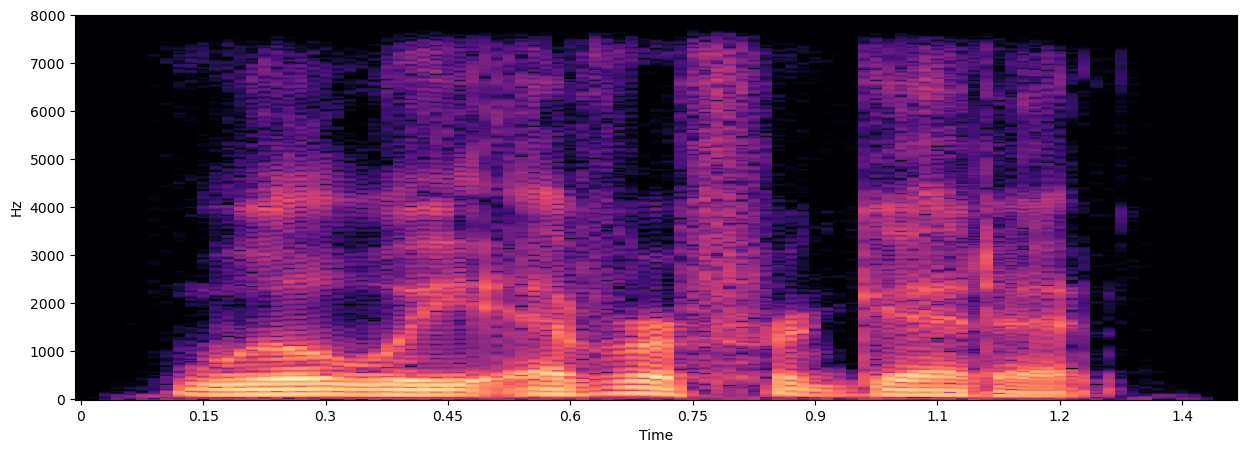

In [14]:
plt.figure(figsize = (15, 5)) 
#convert the amplitude to decibels, just for illustration purpose 
Xdb = librosa.amplitude_to_db(abs(X)) 
librosa.display.specshow(Xdb, #spectrogram                         
sr = x_sr, #sampling rate 
x_axis = 'time', #label for horizontal axis     
y_axis = 'linear', #presentation scale 
hop_length = hop_length) #hop_length 

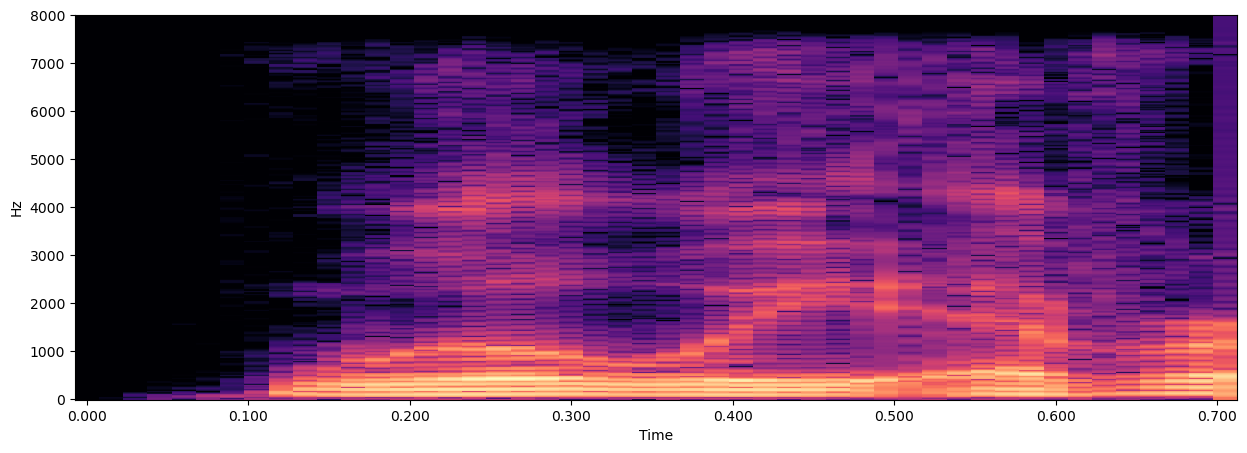

In [24]:
X1 = librosa.stft(np.float32(x1),  
n_fft = freq_range,  
window = window,  
hop_length = hop_length,  
win_length = win_length) 

plt.figure(figsize = (15, 5)) 
#convert the amplitude to decibels, just for illustration purpose 
Xdb1 = librosa.amplitude_to_db(abs(X1)) 
librosa.display.specshow(Xdb1, #spectrogram                         
sr = x_sr, #sampling rate 
x_axis = 'time', #label for horizontal axis     
y_axis = 'linear', #presentation scale 
hop_length = hop_length) #hop_length 

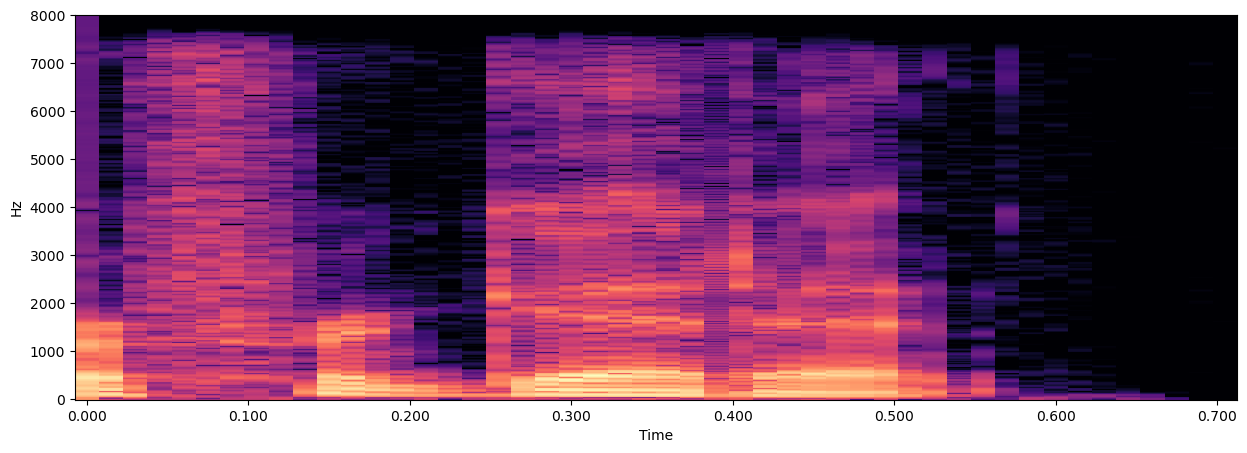

In [25]:
X2 = librosa.stft(np.float32(x2),  
n_fft = freq_range,  
window = window,  
hop_length = hop_length,  
win_length = win_length) 

plt.figure(figsize = (15, 5)) 
#convert the amplitude to decibels, just for illustration purpose 
Xdb2 = librosa.amplitude_to_db(abs(X2)) 
librosa.display.specshow(Xdb2, #spectrogram                         
sr = x_sr, #sampling rate 
x_axis = 'time', #label for horizontal axis     
y_axis = 'linear', #presentation scale 
hop_length = hop_length) #hop_length 

In [15]:
#number of samples 
N = 600 
#sample spacing 
T = 1.0 / N 
t = np.linspace(0.0, N*T, N) 
s1 = np.sin(50.0 * 2.0 * np.pi * t) 
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t) 
s = s1 + s2 

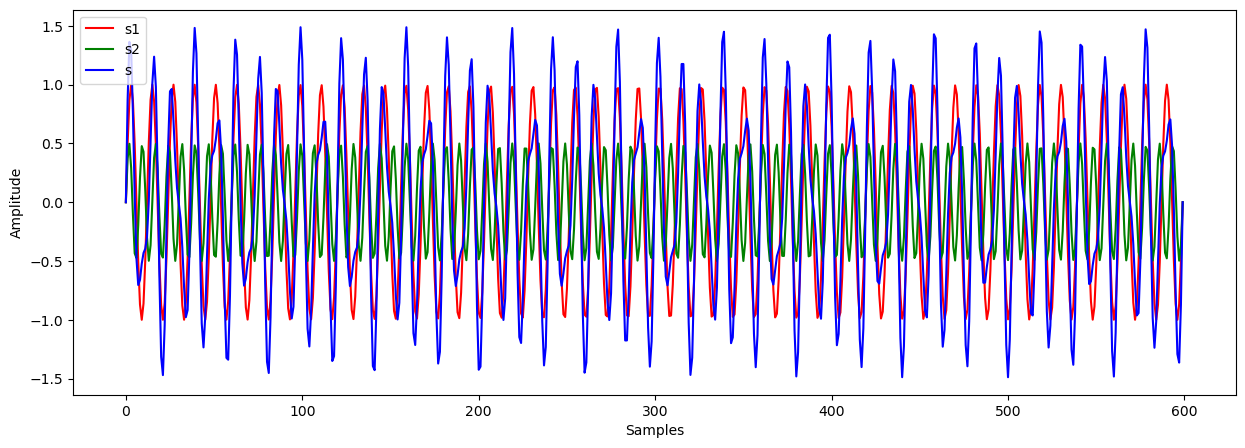

In [16]:
plt.figure(figsize = (15, 5)) 
plt.plot(s1, label = 's1', color = 'r') 
plt.plot(s2, label = 's2', color = 'g') 
plt.plot(s, label = 's', color = 'b') 
plt.xlabel('Samples') 
plt.ylabel('Amplitude') 
plt.legend(loc = "upper left") 

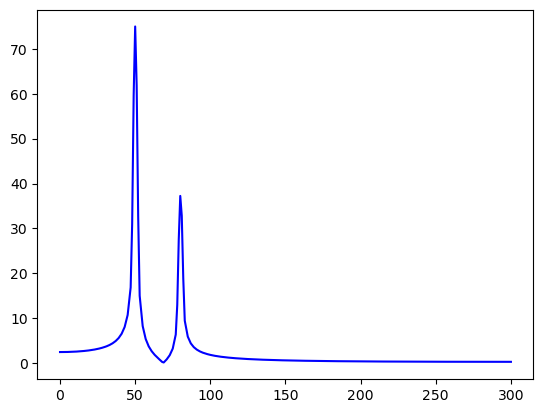

In [17]:
S = librosa.stft(s, n_fft = N, window = 'hann', hop_length = N, win_length = N) 
S_0 = S[:, 0] 
mag_S_0 = np.abs(S_0) 
plt.plot(mag_S_0, color = 'b') 

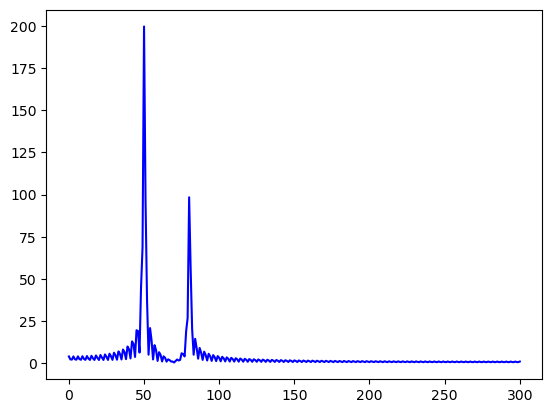

In [21]:
#we define a window length m with fewer samples 
m = 400 
S = librosa.stft(s, n_fft = N, window = 'boxcar', hop_length = int(m/2), win_length = m) 
#we take S_1, which is an intermediate frame. 
S_1 = S[:, 1] 
mag_S_1 = np.abs(S_1) 
plt.plot(mag_S_1, color = 'b') 

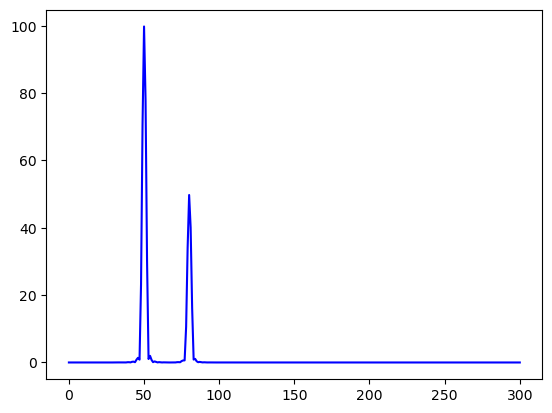

In [22]:
#we define a window length m with fewer samples 
m = 400 
S = librosa.stft(s, n_fft = N, window = 'hann', hop_length = int(m/2), win_length = m) 
#we take S_1, which is an intermediate frame. 
S_1 = S[:, 1] 
mag_S_1 = np.abs(S_1) 
plt.plot(mag_S_1, color = 'b') 

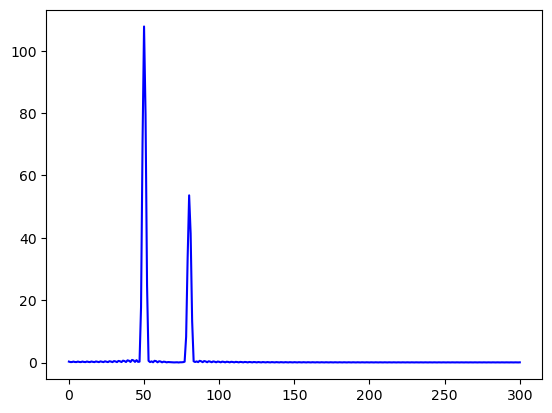

In [23]:
#we define a window length m with fewer samples 
m = 400 
S = librosa.stft(s, n_fft = N, window = 'hamming', hop_length = int(m/2), win_length = m) 
#we take S_1, which is an intermediate frame. 
S_1 = S[:, 1] 
mag_S_1 = np.abs(S_1) 
plt.plot(mag_S_1, color = 'b') 